In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# **IMPORTING LIBRARIES AND DATASET**

In [2]:
import pandas as pd 
  
data = pd.read_csv('1429_1.csv') 
print(data)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34655                                                NaN  B006GWO5W

# **CHECKING NULL VALUES**

In [3]:
data = data[["id","reviews.text","reviews.rating"]]
data.isnull().sum()


id                 0
reviews.text       1
reviews.rating    33
dtype: int64

# **REMOVING NULL VALUES**

In [4]:
#since null  values are less we can drop null values
data=data.dropna()
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


# **DATA VISUALISATION**

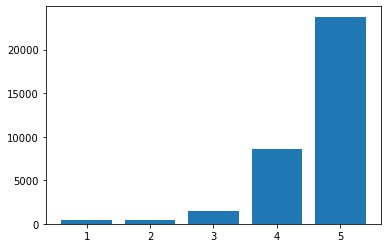

In [5]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

# **DATA PRE-PROCESSING**

# **ASSIGNING SCORE TO EACH REVIEW**

1.BAD (0) for star rating 1 and 2.

2.AVERAGE (1) for star rating 3.

3.EXCELLENT (2) for star rating 4 and 5

In [6]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

data["sentiment"] = data["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
data["sentiment"] = pd.to_numeric(data["sentiment"], errors='coerce')                                    
data = data.dropna(subset=["sentiment"])
data["sentiment"]  = data["sentiment"] .astype(int)

In [7]:
data

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,2
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,2
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0,2
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0,2
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0,2
...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,3.0,1
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,1.0,0
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,1.0,0
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,1.0,0


# **IMPORTING NLTK FOR IMPLEMENTING NLP**

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **TOKENISATION**

In [9]:
data["reviews.text"]=data["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
data["reviews.text"]=data["reviews.text"].str.lower()
#tokenizer = RegexpTokenizer(r'\w+')


# **REMOVING STOP WORDS**

In [10]:
words_descriptions = data["reviews.text"].str.split()

stopword_list = stopwords.words('english')


# **STEMMING**

In [11]:
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

data['cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
data['cleaned'].head()

0    product far disappoint children love use like ...
1       great beginn experienc person bought gift love
2    inexpens tablet use learn step nabi thrill lea...
3    fire hd two week love tablet great valu prime ...
4    bought grand daughter come visit set user ente...
Name: cleaned, dtype: object

# **PRINT PRE-PROCESSED DATA**

In [12]:
data

,id,reviews.text,reviews.rating,sentiment,cleaned
0,AVqkIhwDv8e3D1O-lebb,this product so far has not disappointed my c...,5.0,2,product far disappoint children love use like ...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person boug...,5.0,2,great beginn experienc person bought gift love
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet for him to use and learn on...,5.0,2,inexpens tablet use learn step nabi thrill lea...
3,AVqkIhwDv8e3D1O-lebb,i ve had my fire hd two weeks now and i love...,4.0,2,fire hd two week love tablet great valu prime ...
4,AVqkIhwDv8e3D1O-lebb,i bought this for my grand daughter when she c...,5.0,2,bought grand daughter come visit set user ente...
...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,this is not appreciably faster than any other ...,3.0,1,appreci faster higher amp charger use kindl ki...
34656,AVpfiBlyLJeJML43-4Tp,amazon should include this charger with the ki...,1.0,0,amazon includ charger kindl fact charg us extr...
34657,AVpfiBlyLJeJML43-4Tp,love my kindle fire but i am really disappoint...,1.0,0,love kindl fire realli disappoint kindl power ...
34658,AVpfiBlyLJeJML43-4Tp,i was surprised to find it did not come with a...,1.0,0,surpris find come type charg cord purchas one ...


# Exploratory Data Analysis

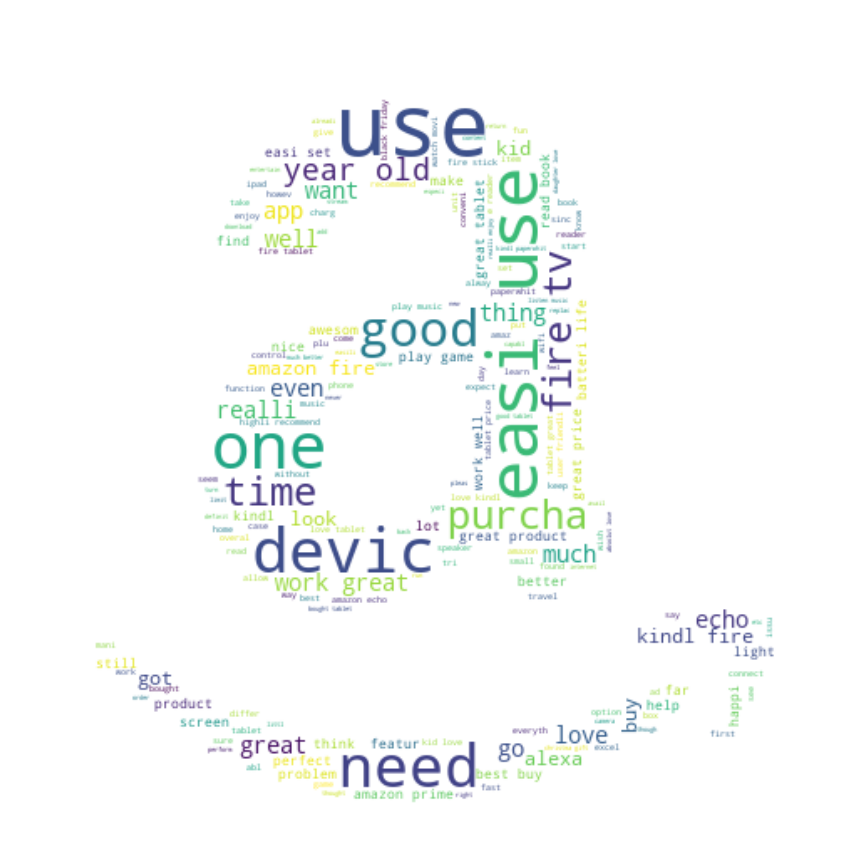

In [19]:
# visualize the frequent words
from PIL import Image
mask = np.array(Image.open('amazon icon.jpg'))
all_words = " ".join([sentence for sentence in data['cleaned']])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(15,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

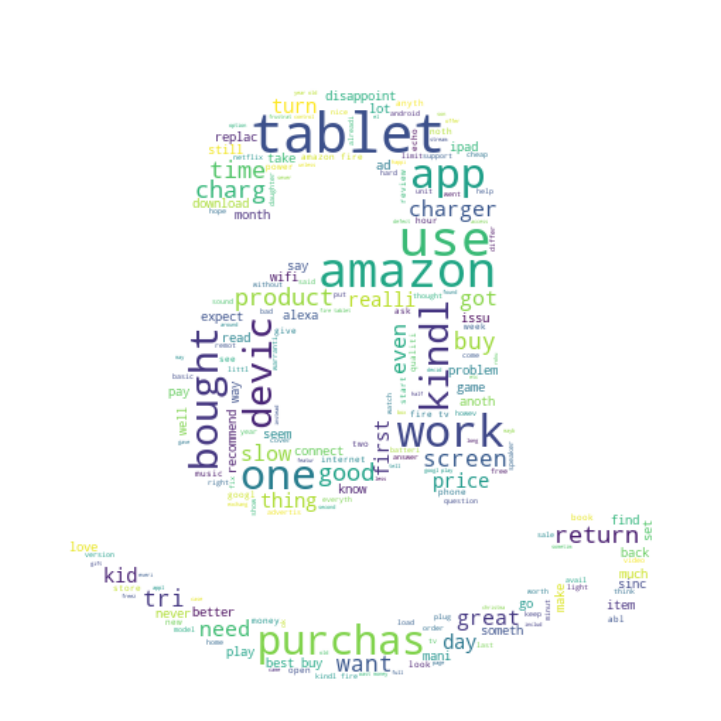

In [21]:
# frequent words visualization for review with bad(0) rating

from PIL import Image
mask = np.array(Image.open('amazon icon.jpg'))
all_words = " ".join([sentence for sentence in data['cleaned'][data['sentiment']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(20,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

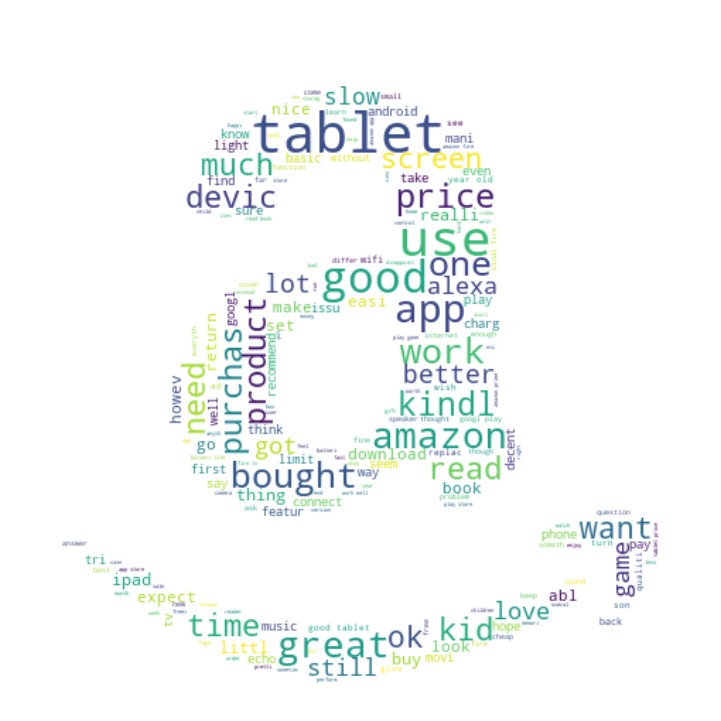

In [22]:
# frequent words visualization for review with average(1) rating

from PIL import Image
mask = np.array(Image.open('amazon icon.jpg'))
all_words = " ".join([sentence for sentence in data['cleaned'][data['sentiment']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(20,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

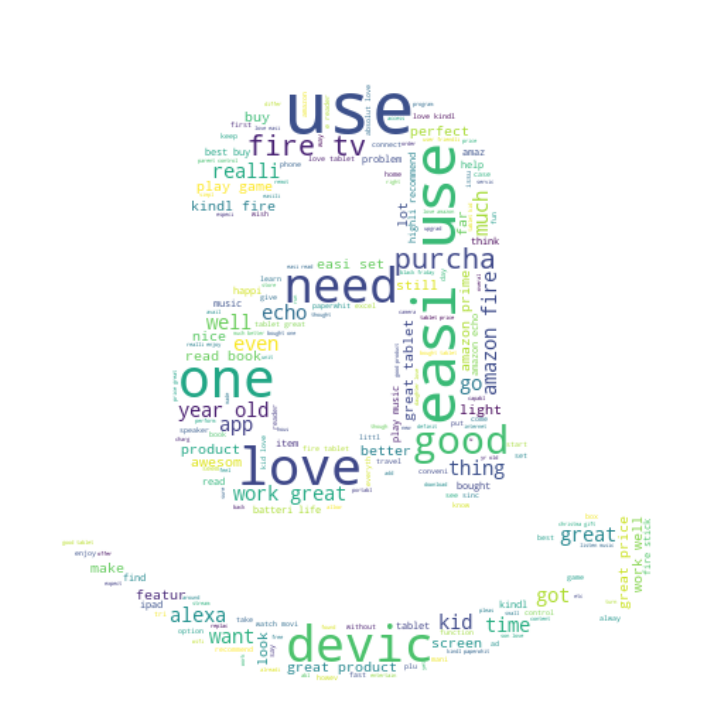

In [23]:
# frequent words visualization for review with excellent(2) rating

from PIL import Image
mask = np.array(Image.open('amazon icon.jpg'))
all_words = " ".join([sentence for sentence in data['cleaned'][data['sentiment']==2]])

from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask,width=mask.shape[1],  height=mask.shape[0], random_state=42, background_color="white", max_font_size=150).generate(all_words)

# plot the graph
plt.figure(figsize=(20,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **FEATURE EXTFRACTION USING TF-IDF VECTORISATION**

In [24]:
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(data['cleaned']).toarray()
texts=pd.DataFrame(text)

In [25]:
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
texts

,0,1,2,3,4,5,6,7,8,9,...,9093,9094,9095,9096,9097,9098,9099,9100,9101,9102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318251,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **SPLITTING DATASET INTO TESTING AND TRAINING DATA**

In [27]:
y=data["sentiment"].values
X=pd.DataFrame(texts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **LOGISTIC REGRESSION MODEL**

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=50)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=50)

In [40]:
print('Train accuracy :', (lr.score(X_train, y_train))*100)
print('Test accuracy :', (lr.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(X_test)))

Train accuracy : 94.14801444043322
Test accuracy : 93.97920877851573

 CONFUSION MATRIX
[[  20    8  129]
 [   7   20  251]
 [   9   13 6469]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.56      0.13      0.21       157
           1       0.49      0.07      0.13       278
           2       0.94      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.66      0.40      0.43      6926
weighted avg       0.92      0.94      0.92      6926



In [30]:
pred = lr.predict(X_test)
accuracy_score(y_test, pred)

0.939936471267687

## **NAIVE BAYES MODEL**

### MULTINOMIAL NAIVE BAYES

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [32]:
print('Train accuracy :', (nb.score(X_train, y_train))*100)
print('Test accuracy :', (nb.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy : 93.22382671480143
Test accuracy : 93.69044181345654

 CONFUSION MATRIX
[[   0    0  157]
 [   0    0  278]
 [   0    2 6489]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.00      0.00      0.00       278
           2       0.94      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.31      0.33      0.32      6926
weighted avg       0.88      0.94      0.91      6926



### BERNOULLI NAIVE BAYES

In [33]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train,y_train)

BernoulliNB()

In [34]:
print('Train accuracy :', (dt.score(X_train, y_train))*100)
print('Test accuracy :', (dt.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

Train accuracy : 91.4476534296029
Test accuracy : 90.73058042159977

 CONFUSION MATRIX
[[  24   24  109]
 [  13   35  230]
 [  87  179 6225]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.19      0.15      0.17       157
           1       0.15      0.13      0.14       278
           2       0.95      0.96      0.95      6491

    accuracy                           0.91      6926
   macro avg       0.43      0.41      0.42      6926
weighted avg       0.90      0.91      0.90      6926



# **RANDOM FOREST**

In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
print('Train accuracy :', (RF.score(X_train, y_train))*100)
print('Test accuracy :', (RF.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, RF.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, RF.predict(X_test)))

Train accuracy : 99.9927797833935
Test accuracy : 93.71931850996246

 CONFUSION MATRIX
[[   5    2  150]
 [   1    3  274]
 [   3    5 6483]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.56      0.03      0.06       157
           1       0.30      0.01      0.02       278
           2       0.94      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.60      0.35      0.35      6926
weighted avg       0.90      0.94      0.91      6926



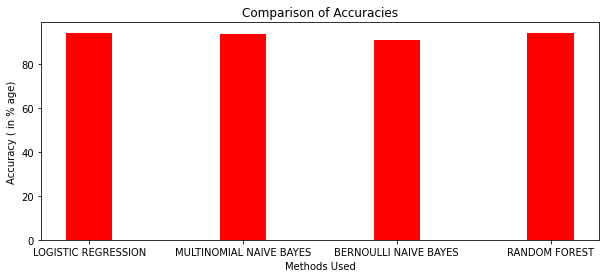

In [38]:
data = {'LOGISTIC REGRESSION':93.90, 'MULTINOMIAL NAIVE BAYES':93.69, 'BERNOULLI NAIVE BAYES':90.73,  
        'RANDOM FOREST':94.11} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 4)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='red',  
        width = 0.3) 
  
plt.xlabel("Methods Used") 
plt.ylabel("Accuracy ( in % age)") 
plt.title("Comparison of Accuracies") 
plt.show() 